<a href="https://colab.research.google.com/github/pawan933-hash/INVENTORY-MANAGEMENT-USING-ABC-ANALYSIS-AND-PARETO-PRINCIPLE./blob/main/PARETO_ABC_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
%%html
<style>
.dataframe td{
  white-space:nowrap
}
</style>

In [ ]:
sales=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trail_notebooks/transactions_100.csv')

In [ ]:
sales

,Unnamed: 0,SKU,ITEM,FAMILY,CATEGORY,STORE,DAY,QTY,TO
0,808,REF-808,ITEM-809,FAMILY-4,FOODS,STORE-1,1,3,6.00
1,809,REF-809,ITEM-810,FAMILY-4,FOODS,STORE-1,1,0,0.00
2,810,REF-810,ITEM-811,FAMILY-4,FOODS,STORE-1,1,0,0.00
3,811,REF-811,ITEM-812,FAMILY-4,FOODS,STORE-1,1,3,8.82
4,812,REF-812,ITEM-813,FAMILY-4,FOODS,STORE-1,1,0,0.00
...,...,...,...,...,...,...,...,...,...
686495,1473795,REF-1473795,ITEM-1570,FAMILY-9,FOODS,NaN,100,4,7.92
686496,1473796,REF-1473796,ITEM-1571,FAMILY-9,FOODS,NaN,100,0,0.00
686497,1473797,REF-1473797,ITEM-1606,FAMILY-9,FOODS,NaN,100,6,17.88
686498,1473798,REF-1473798,ITEM-1572,FAMILY-9,FOODS,NaN,100,0,0.00


In [ ]:
metric_col='QTY'
GRBY=['ITEM','FAMILY']
#Pivot Table by ITem
df_abc=pd.pivot_table(
    sales,
    index=GRBY,
    values=metric_col,
    columns='DAY',
    aggfunc='sum').fillna(0)
print("Number of Iteams: {:,}".format(len(df_abc)))
df_abc.head()

Number of Iteams: 812


,DAY,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
ITEM,FAMILY,,,,,,,,,,,,,,,,,,,,,
ITEM-1000,FAMILY-5,2,4,5,1,0,5,1,1,7,3,...,1,5,7,3,8,3,0,2,4,6
ITEM-1001,FAMILY-5,8,14,9,6,12,15,17,28,23,19,...,9,16,11,12,7,5,16,10,8,4
ITEM-1002,FAMILY-5,7,27,14,12,11,18,6,30,23,21,...,19,5,13,13,17,9,5,10,10,16
ITEM-1003,FAMILY-5,5,4,5,1,7,5,9,5,5,4,...,5,8,5,6,14,5,9,3,8,6
ITEM-1004,FAMILY-5,22,16,14,14,16,10,11,17,12,16,...,3,17,9,11,8,6,6,7,10,8


In [ ]:
LIST_DAYS=df_abc.columns.tolist()
#Total Sales
df_abc[f'{metric_col}']=df_abc[LIST_DAYS].sum(axis=1)
#Sales Stats
df_abc['MEAN']=df_abc[LIST_DAYS].mean(axis=1)
df_abc['STD']=df_abc[LIST_DAYS].std(axis=1)
df_abc['MAX']=df_abc[LIST_DAYS].max(axis=1)
df_abc['DAYS_ACTIVE']=(df_abc[LIST_DAYS]>0).std(axis=1)
#Filter out the items w/o sales
df_abc=df_abc[df_abc[f'{metric_col}']>0]
#Cofficient of Variation
df_abc['CV']=df_abc['STD']/df_abc['MEAN']
df_abc.head()


,DAY,1,2,3,4,5,6,7,8,9,10,...,97,98,99,100,QTY,MEAN,STD,MAX,DAYS_ACTIVE,CV
ITEM,FAMILY,,,,,,,,,,,,,,,,,,,,,
ITEM-1000,FAMILY-5,2,4,5,1,0,5,1,1,7,3,...,0,2,4,6,331,3.31,2.227899,12,0.238683,0.673081
ITEM-1001,FAMILY-5,8,14,9,6,12,15,17,28,23,19,...,16,10,8,4,1193,11.93,5.525432,28,0.000000,0.463154
ITEM-1002,FAMILY-5,7,27,14,12,11,18,6,30,23,21,...,5,10,10,16,1340,13.40,6.410219,32,0.000000,0.478375
ITEM-1003,FAMILY-5,5,4,5,1,7,5,9,5,5,4,...,9,3,8,6,643,6.43,3.913858,20,0.000000,0.608687
ITEM-1004,FAMILY-5,22,16,14,14,16,10,11,17,12,16,...,6,7,10,8,1084,10.84,5.509808,34,0.100000,0.508285


In [ ]:
''' Pareto Calculation on metric_col '''
pareto = df_abc.drop(LIST_DAYS, axis=1).copy()
pareto[f'{metric_col}_%'] = (100 * pareto[f'{metric_col}']) / pareto[f'{metric_col}'].sum()
pareto.sort_values(
    by=f'{metric_col}_%',
    ascending=False,
    inplace=True)
pareto.head()
#Cumulative Sum
pareto[f'{metric_col}_%_CS']=pareto[f'{metric_col}_%'].cumsum()
# SKU Counts
n_sku = len(pareto)
pareto['SKU_ID'] = pd.Series(range(1, n_sku + 1), index=pareto.index)
pareto['SKU_%'] = (100 * pareto['SKU_ID'] / (n_sku + 1))
# ABC Segmentation
criterion_a = 20/100
criterion_b = 50/100
n_a = int(criterion_a * n_sku)
n_b = int(criterion_b * n_sku)
pareto['ABC'] = pareto['SKU_ID'].apply(
    lambda x: 'A' if x <= n_a else ('B' if x <= n_b else 'C')
)
pareto.head()

,DAY,QTY,MEAN,STD,MAX,DAYS_ACTIVE,CV,QTY_%,QTY_%_CS,SKU_ID,SKU_%,ABC
ITEM,FAMILY,,,,,,,,,,,
ITEM-1451,FAMILY-8,48322,483.22,98.523502,713,0.0,0.203890,2.742242,2.742242,1,0.123001,A
ITEM-1452,FAMILY-8,33170,331.70,78.474019,572,0.0,0.236581,1.882376,4.624617,2,0.246002,A
ITEM-1433,FAMILY-8,29216,292.16,66.720390,438,0.0,0.228369,1.657989,6.282606,3,0.369004,A
ITEM-1274,FAMILY-7,26885,268.85,73.382542,481,0.0,0.272950,1.525706,7.808312,4,0.492005,A
ITEM-1504,FAMILY-9,21429,214.29,43.216695,353,0.0,0.201674,1.216082,9.024394,5,0.615006,A


In [ ]:
pareto['ABC'].value_counts()

,count
ABC,
C,406
B,244
A,162


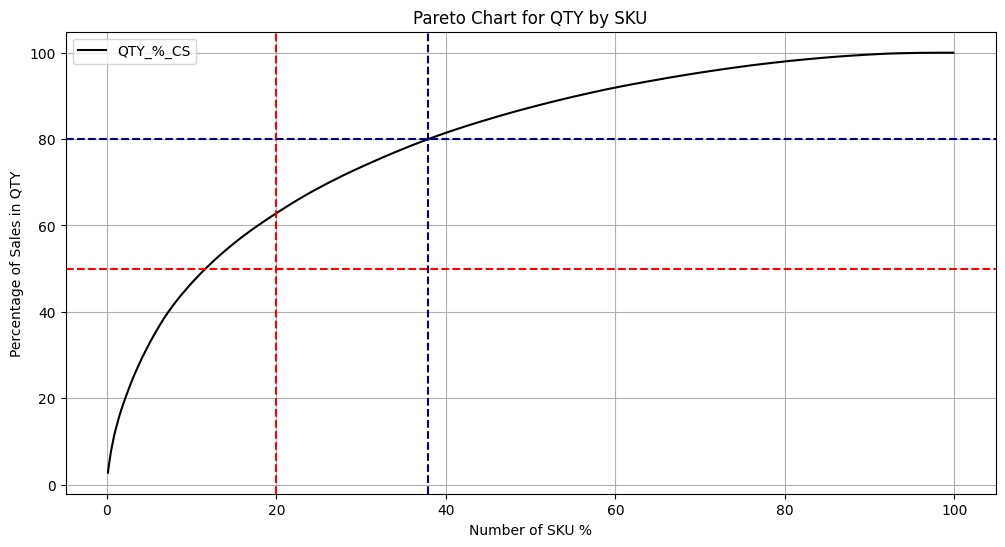

In [ ]:
'''Pareto Chart by metric_col '''
ax = plt.gca()
pareto.plot(
    figsize=(12, 6),
    x='SKU_%',
    y=f'{metric_col}_%_CS',
    ax=ax,
    color = "black",
    grid = True
)
# Cumulative % of SKUs to reach 80% of Sales
cumul_sku_80 = pareto[pareto[f'{metric_col}_%_CS'] <= 80]['SKU_%'].max()
# Cumulative % Sales of the top 20%
sales_sku20 = pareto[pareto[f'SKU_%'] <= 20][f'{metric_col}_%_CS'].max()
# Vertical lines
ax.axvline(20, color = "red", linestyle='--')
ax.axvline(cumul_sku_80, color = "darkblue", linestyle = "--")
# Horizontal lines
ax.axhline(80, color = "darkblue", linestyle='--')
ax.axhline(50, color = "red", linestyle='--')
# Titles
plt.title(f'Pareto Chart for {metric_col} by SKU')
plt.xlabel('Number of SKU %')
plt.ylabel(f'Percentage of Sales in {metric_col}')
plt.show()

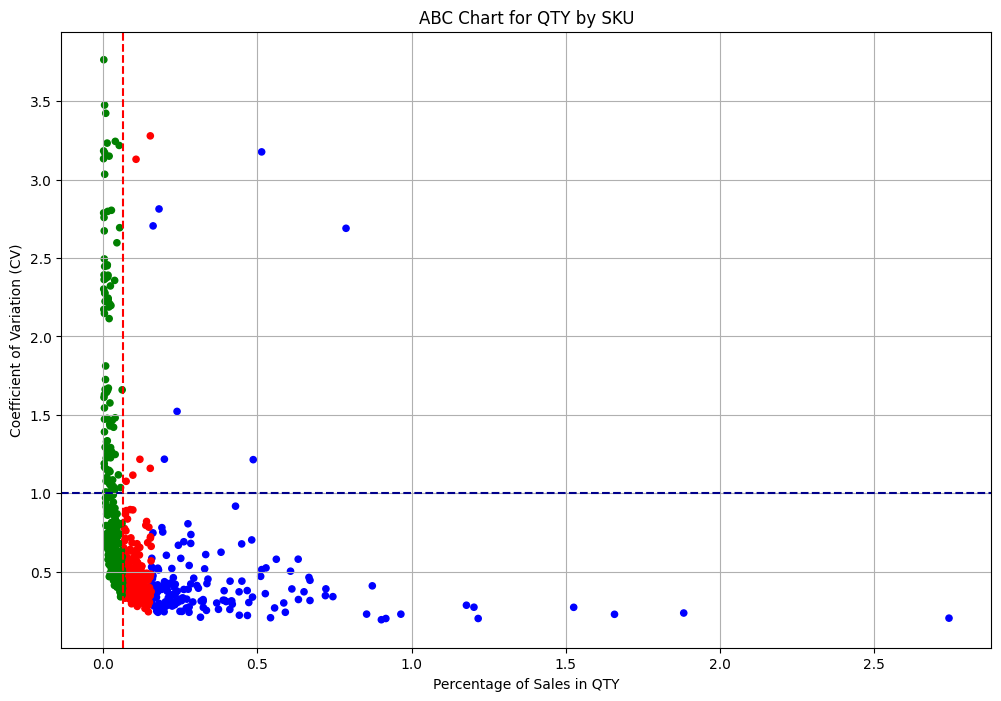

In [ ]:
''' ABC Chart '''
max_CV = 4
color = {
    'A': 'blue',
    'B': 'red',
    'C': 'green'
}

df_plot = pareto[pareto['CV'] <= max_CV].copy()
# Scatter Plot
ax = plt.gca()
df_plot.plot.scatter(
    figsize=(12, 8),
    x=f'{metric_col}_%',
    y='CV',
    ax=ax,
    color=df_plot['ABC'].map(color),
    grid = True)
# Horizontal Line
ax.axhline(1, color = "darkblue", linestyle = "--")
# Vertical Line: Limit A
limit_a = pareto[pareto['ABC'] == 'A'][f'{metric_col}_%'].min()
limit_a = pareto[pareto['ABC'] == 'B'][f'{metric_col}_%'].min()
ax.axvline(limit_a, color = "red", linestyle = "--")
# Titles
plt.title(f'ABC Chart for {metric_col} by SKU')
plt.xlabel(f'Percentage of Sales in {metric_col}')
plt.ylabel('Coefficient of Variation (CV)')
plt.show()